In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Load the data
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [33]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age', 'Medal', 'Height', 'Weight']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

# Make sure the first letter of the columns is capitalized, but if a column has multiple capital letters, keep it like that
# This is to make sure the columns are consistent

regions_columns_to_be_cleaned = ['Continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)
# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')



In [34]:
# Utility variables
medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['Continent'].value_counts()
medal_count = medal_count.reindex(regions_order)

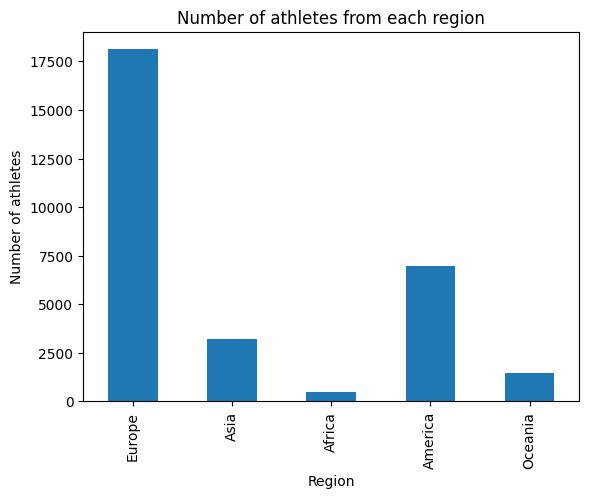

In [35]:
# 2.1
# ### 2.1. From which region do the most athletes come from?

# Count the number of athletes from each region
athletes_count = merged_data['Continent'].value_counts()
athletes_count = athletes_count.reindex(regions_order)
athletes_count.plot(kind='bar')
plt.title('Number of athletes from each region')
plt.xlabel('Region')
plt.ylabel('Number of athletes')
plt.show()

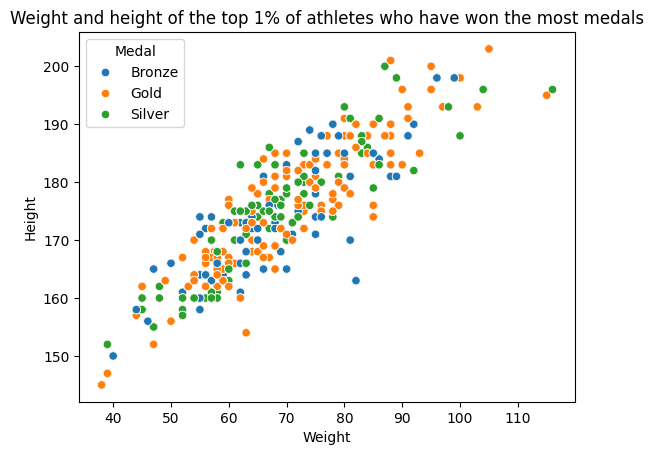

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes',
       'Continent'],
      dtype='object')


In [36]:
# 3.1 and 3.2
# ## 3.1. Do athletes who have previously won medals exhibit any unique characteristics or patterns in their subsequent performances, suggesting a "medal-winning mindset" or sustained excellence?

# Get the top 1% of athletes who have won the most medals
top_1_percent_athletes = medal_data['Name'].value_counts().nlargest(int(len(medal_data) * 0.01))
top_1_percent_athletes = medal_data[medal_data['Name'].isin(top_1_percent_athletes.index)]

# Display the weight and height of the top 1% of athletes who have won the most medals
sns.scatterplot(x='Weight', y='Height', data=top_1_percent_athletes, hue='Medal')
plt.title('Weight and height of the top 1% of athletes who have won the most medals')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

print(merged_data.columns)





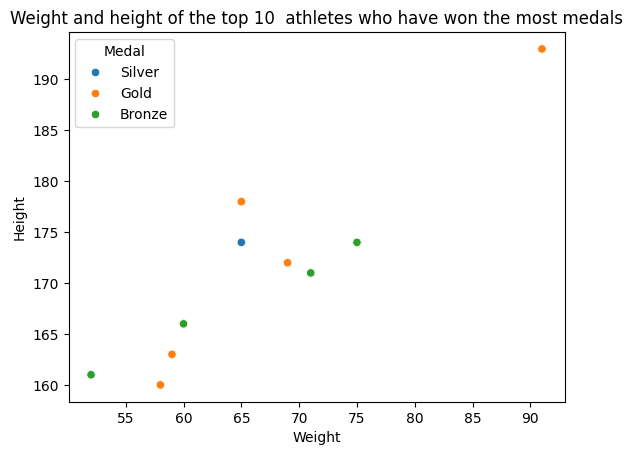

In [46]:
# 3.2
# Of the outliers from the top 1% of athletes who have won the most medals, what are their characteristics?
# Print the top 10 performing outliers

# Do this based on the mean and standard deviation of the top 1% of athletes who have won the most medals
# Group by athlete and count the number of medals

athlete_medals = merged_data.groupby('Name')['Medal'].count()

# Calculate the cutoff for the top 1% of medal counts
cutoff = athlete_medals.quantile(0.99)

# Filter the athletes who have won more medals than the cutoff
top_athletes = athlete_medals[athlete_medals > cutoff]

# Sort these athletes by the number of medals and take the top 10
top_athletes = top_athletes.sort_values(ascending=False).head(10)

unique_athletes = merged_data[merged_data['Name'].isin(top_athletes.index.unique())]

sns.scatterplot(x='Weight', y='Height', data=unique_athletes, hue='Medal')
plt.title('Weight and height of the top 10  athletes who have won the most medals')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

